In [1]:
# adding paths to importing things from "data" and "functions and methods" directories.
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from urllib.request import urlopen

from lisc import Counts
from lisc.objects.base import Base
from lisc.utils.db import SCDB
from lisc.utils.io import save_object
from lisc.plts.counts import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from data.lisc_db.terms.terminology import stages, waves, eeg_features_2, additional_features
from utils.searchterms import format_terms

# ___EXPERIMENTING WITH LISC SECTION___ (SKIP)

## Resources
- https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESearch
- https://pubmed.ncbi.nlm.nih.gov/help/#search-tags

ctrl+f: Search Field descriptions and tags

In [3]:
# initialize lisc SCDB (database) object.
db = SCDB('lisc_db')
db.gen_paths()

In [4]:
terms_a = [['"stage 1 sleep"'], ['"stage one sleep"'], ['"light sleep"']]
counts = Counts()
counts.add_terms(terms_a)
counts.run_collection(verbose=False, db='pubmed', field='tiab', directory='db')
counts.check_counts()

The number of documents found for each search term is:
  '"stage 1 sleep"'     -   4094
  '"stage one sleep"'   -   1945
  '"light sleep"'       -   8014


In [5]:
### Save a lisc object into DB ###

# absolute path to project directory '../GitHub/Predict-Sleep-EEG/'.
main_dir = os.path.dirname(os.getcwd())

# absolute path to Level 2: Data directory 'data/lisc_db/data/counts/'.
db_dir = os.path.join(main_dir, r'data/' + db.get_folder_path('counts'))
db_dir

# save lisc data object in db_dir path.
save_object(counts, 'counts.p', directory=db_dir)

In [6]:
### Load a lisc object from DB ###

# relative path to lisc object in database 'data/lisc_db/data/counts/counts.p'
data_rpath = db.get_file_path('counts', 'counts.p')

# absolute path to lisc object.
data_abpath = os.path.join(main_dir, r'data/' + data_rpath)

# load lisc Counts() object with pandas.
pickle = pd.read_pickle(data_abpath)
pickle.check_counts()

The number of documents found for each search term is:
  '"stage 1 sleep"'     -   4094
  '"stage one sleep"'   -   1945
  '"light sleep"'       -   8014


In [9]:
# List of multiple terms, each with synonyms
stages

[['stage 1 sleep', 'stage one sleep', 'light sleep'],
 ['stage 2 sleep', 'stage two sleep'],
 ['stage 3 sleep', 'stage three sleep'],
 ['stage 4 sleep', 'stage four sleep'],
 ['rem', 'rapid eye movement', 'paradoxical sleep']]

In [11]:
base = Base()
base.add_terms(stages)

exclusions = [[], [], [], [], ['paradox']]
base.add_terms(exclusions, 'exclusions')

# ___BEGIN STAGES AND FEATURES CO-OCCURANCES SECTION___

In [44]:
terms_a = stages
terms_b = [wave + ' ' + feature for wave in waves for feature in eeg_features_2] + additional_features

stages_counts = Counts()
stages_counts.add_terms(terms_a, dim='A')
stages_counts.add_terms(terms_b, dim='B')
stages_counts.run_collection()

In [45]:
stages_counts.check_counts()

The number of documents found for each search term is:
  'stage 1 sleep'   -     891
  'stage 2 sleep'   -     634
  'stage 3 sleep'   -    1483
  'stage 4 sleep'   -     189
  'rem'             -   22016


In [46]:
### Save a lisc object into DB ###

# absolute path to project directory '../GitHub/Predict-Sleep-EEG/'.
main_dir = os.path.dirname(os.getcwd())

# absolute path to Level 2: Data directory 'data/lisc_db/data/counts/'.
db_dir = os.path.join(main_dir, r'data/' + db.get_folder_path('counts'))
db_dir

# save lisc data object in db_dir path.
save_object(stages_counts, 'stages-feats.p', directory=db_dir)

In [47]:
### Load a lisc object from DB ###

# relative path to lisc object in database 'data/lisc_db/data/counts/counts.p'
data_rpath = db.get_file_path('counts', 'stages-feats.p')

# absolute path to lisc object.
data_abpath = os.path.join(main_dir, r'data/' + data_rpath)

# load lisc Counts() object with pandas.
pickle = pd.read_pickle(data_abpath)
pickle.check_counts()

The number of documents found for each search term is:
  'stage 1 sleep'   -     891
  'stage 2 sleep'   -     634
  'stage 3 sleep'   -    1483
  'stage 4 sleep'   -     189
  'rem'             -   22016


In [48]:
# Collected counts data of terms_b ON terms_a
pickle.check_data(data_type='counts', dim='A')

For  'stage 1 sleep'  the highest association is  'slow wave'                 with         225
For  'stage 2 sleep'  the highest association is  'slow wave'                 with         199
For  'stage 3 sleep'  the highest association is  'slow wave'                 with         216
For  'stage 4 sleep'  the highest association is  'slow wave'                 with          48
For  'rem'            the highest association is  'slow wave'                 with        4014


In [49]:
# Collected counts data of terms_a ON terms_b
pickle.check_data(data_type='counts', dim='B')

For  'alpha oscillations'        the highest association is  'rem'            with           8
For  'alpha rhythm'              the highest association is  'rem'            with          28
For  'alpha waves'               the highest association is  'rem'            with          14
For  'alpha power'               the highest association is  'rem'            with          56
For  'alpha coherence'           the highest association is  'stage 2 sleep'  with           1
For  'alpha phase'               the highest association is  'rem'            with           1
For  'alpha frequency'           the highest association is  'rem'            with          17
For  'alpha band'                the highest association is  'rem'            with          30
For  'delta oscillations'        the highest association is  'rem'            with          20
For  'delta rhythm'              the highest association is  'rem'            with           8
For  'delta waves'               the highest assoc

In [50]:
# Compute the normalized similarity scores
pickle.compute_score('normalize', dim='A')
print(pickle.score)

[[1.12233446e-03 4.48933782e-03 4.48933782e-03 4.48933782e-03
  0.00000000e+00 0.00000000e+00 1.12233446e-03 1.12233446e-03
  1.12233446e-03 0.00000000e+00 3.36700337e-03 1.34680135e-02
  0.00000000e+00 1.12233446e-03 4.48933782e-03 1.12233446e-03
  2.24466891e-03 0.00000000e+00 2.24466891e-03 2.24466891e-03
  0.00000000e+00 0.00000000e+00 1.12233446e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73400673e-03
  0.00000000e+00 0.00000000e+00 1.12233446e-03 1.12233446e-03
  2.24466891e-03 1.12233446e-03 0.00000000e+00 1.12233446e-03
  0.00000000e+00 0.00000000e+00 1.12233446e-03 2.24466891e-03
  0.00000000e+00 0.00000000e+00 1.12233446e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.12233446e-03 1.12233446e-03
  4.48933782e-03 1.79573513e-02 0.00000000e+00 1.12233446e-03
  2.52525253e-01]
 [0.00000000e+00 6.30914826e-03 0.00000000e+00 3.15457413e-03
  1.57728707e-03 0.00000000e+00 3.15457413e-03 1.57728707e-03
  0.00000000e+00 0.00000000e+00 1.10410095e-02 7.886

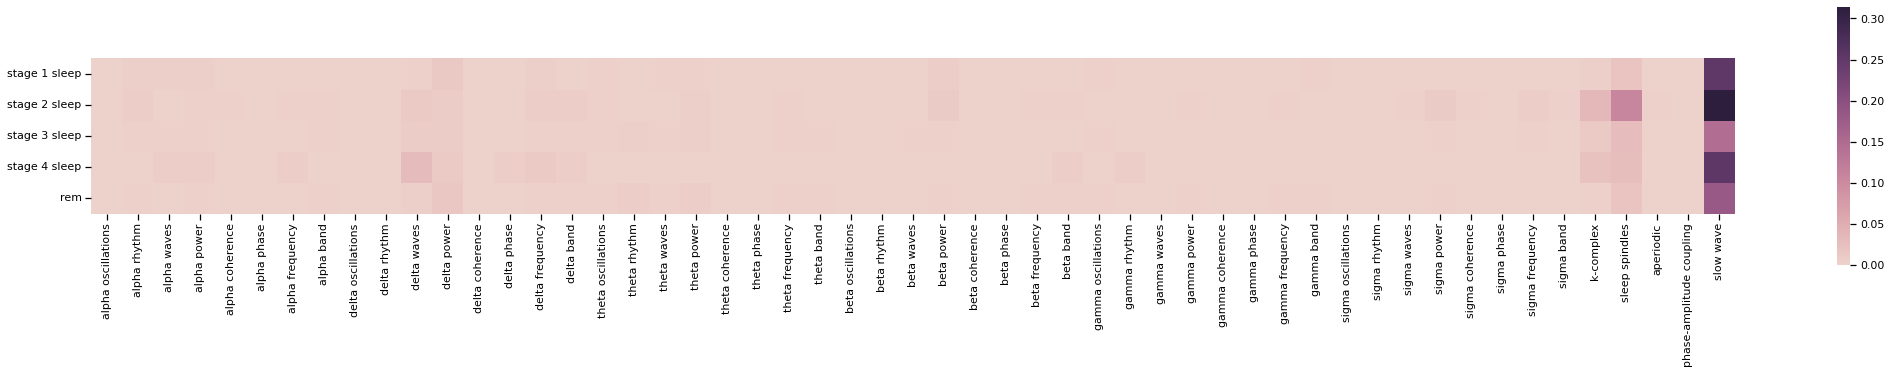

In [51]:
plot_matrix(pickle, attribute='score', figsize=(30, 5), square=True) # kwargs sent to seaborn

## ___LET'S REMOVE SLOW WAVE FROM THE FEATURES LIST___

In [52]:
terms_a = stages
terms_b = [wave + ' ' + feature for wave in waves for feature in eeg_features_2] + additional_features
terms_b.remove('slow wave')

stages_counts = Counts()
stages_counts.add_terms(terms_a, dim='A')
stages_counts.add_terms(terms_b, dim='B')
stages_counts.run_collection()

In [53]:
### Save a lisc object into DB ###

# absolute path to project directory '../GitHub/Predict-Sleep-EEG/'.
main_dir = os.path.dirname(os.getcwd())

# absolute path to Level 2: Data directory 'data/lisc_db/data/counts/'.
db_dir = os.path.join(main_dir, r'data/' + db.get_folder_path('counts'))
db_dir

# save lisc data object in db_dir path.
save_object(stages_counts, 'stages-feats-2.p', directory=db_dir)

In [54]:
### Load a lisc object from DB ###

# relative path to lisc object in database 'data/lisc_db/data/counts/counts.p'
data_rpath = db.get_file_path('counts', 'stages-feats-2.p')

# absolute path to lisc object.
data_abpath = os.path.join(main_dir, r'data/' + data_rpath)

# load lisc Counts() object with pandas.
pickle2 = pd.read_pickle(data_abpath)
pickle2.check_counts()

The number of documents found for each search term is:
  'stage 1 sleep'   -     891
  'stage 2 sleep'   -     634
  'stage 3 sleep'   -    1483
  'stage 4 sleep'   -     189
  'rem'             -   22016


In [55]:
# Compute the normalized similarity scores
pickle2.compute_score('normalize', dim='A')

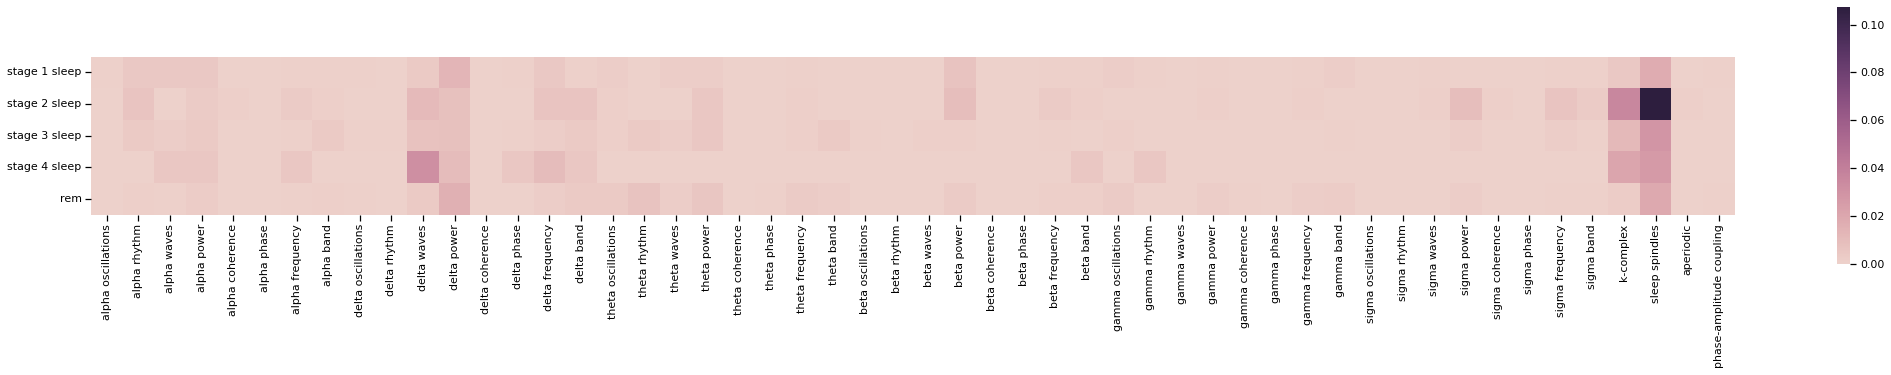

In [56]:
plot_matrix(pickle2, attribute='score', figsize=(30, 5), square=True) # kwargs sent to seaborn

In [59]:
pickle2.check_data('counts')

For  'stage 1 sleep'  the highest association is  'sleep spindles'            with          16
For  'stage 2 sleep'  the highest association is  'sleep spindles'            with          68
For  'stage 3 sleep'  the highest association is  'sleep spindles'            with          43
For  'stage 4 sleep'  the highest association is  'delta waves'               with           6
For  'rem'            the highest association is  'sleep spindles'            with         429
